|<img src="http://pierreproulx.espaceweb.usherbrooke.ca/images/usherb_transp.gif"> | Pierre Proulx, ing, professeur|
|:---|:---|
|Département de génie chimique et de génie biotechnologique |** GCH200-Phénomènes d'échanges I **|

### Section 2.2, écoulement d'un film de fluide Newtonien sur un plan incliné.

> Dans cette section il est important de revoir les concepts de flux de quantité de mouvement vus au chapitre 1.  Voici un résumé des points qui seront utilisés dans la section 2.2:

http://pierreproulx.espaceweb.usherbrooke.ca/images/GCH200_Ch1_resume.pdf

### Film d'un fluide newtonien, section 2.2 Transport Phenomena

>Le développement fait dans Transport Phenomena sera répété ici en développant les solutions avec le calculateur formel sympy et en traçant la solution avec sympy.plot.

>>Un fluide Newtonien s'écoule sous l'effet de la gravité sur un plan incliné: 
<img src='http://pierreproulx.espaceweb.usherbrooke.ca/images/Chap-2-Section-2-2.png'>

>>Le bilan fait sur le film de fluide est schématisé ainsi:
<img src='http://pierreproulx.espaceweb.usherbrooke.ca/images/Chap-2-Section-2-2-p.png'>

>Plusieurs des termes montrés sur la figure ci-haut sont nuls, :


$
\begin{equation*}
  \boxed{ v_x=0 \quad  v_y=0 \quad \tau_{zz}=0 \quad \tau_{yz}=0 }
  \end{equation*}
$

>et de plus, on a que:

$
\begin{equation*}
  \boxed{ \rho v_z v_z \quad  et \quad p }
  \end{equation*}
$

>ne varient pas en fonction de z, ce qui fera que 

$
\begin{equation*}
  \boxed{\phi_{zz}=constante }
  \end{equation*}
$ 

>Dans le traitement qui sera fait dans sympy on utilisera $\phi_{zz} = C $.

In [28]:
#
# Pierre Proulx
#
# Préparation de l'affichage et des outils de calcul symbolique
#
import sympy as sp               # pour utiliser sympy, on lui donne l'alias sp
from IPython.display import *   # pour utiliser display qui formate les équations
sp.init_printing(use_latex=True) # pour utiliser LaTeX, formattage de grande qualité

### On pourrait aussi utiliser 
> sp.init_printing(use_latex=False)
### Le résultat sera le même, mais le formattage des équations sera beaucoup moins élégant,

In [29]:
#
# définition des variables symboliques
#
x,delta_x,L,W,rho,g,beta,mu,delta=sp.symbols('x,delta_x,L,W,rho,g,beta,mu,delta')
tau_xz=sp.symbols('tau_xz')
phi_xz=sp.symbols('phi_xz')
phi_zz=sp.symbols('phi_zz')
C1,C2=sp.symbols('C1,C2')

#### On pose le bilan:

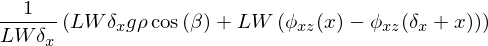

In [30]:
# Bilan des forces
dV=W*L*delta_x
dAx=L*W
dAz=W*delta_x
bilan=dAx*(phi_xz(x)-phi_xz(x+delta_x))+dAz*(phi_zz(0)-phi_zz(L))+dV*rho*g*sp.cos(beta)   
bilan=bilan/(L*W*delta_x)
# mais phi_zz est le même en z=0 et en z=L, donc le terme de phi_zz(0) - phi_zz(L) =0
bilan=bilan.subs((phi_zz(0)-phi_zz(L)),0)
display(bilan)

> *Dans le bilan obtenu ci-haut on prend la limite quand $\delta x \rightarrow 0 $ On le fait avec **sympy** mais notez bien  que ce sont des manipulations de calcul algébrique qu'on ferait facilement à la main. Suivez bien les développements en faisant les mêmes sur une feuille de papier à côté. Vous obtiendrez le même résultat, même si votre notation peut être un peu différente et si vos manipulations ne sont pas exactement les mêmes. L'utilité du calculateur symbolique deviendra de plus en plus évidente au fur et à mesure que les problèmes deviendront plus complexes. *


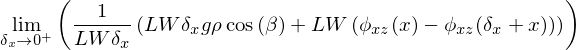

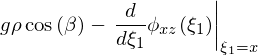

In [31]:
eq0=sp.Limit(bilan,delta_x,0)    # ces deux fonctions sont différentes, la première ne fait que poser la limite
eq1=sp.limit(bilan,delta_x,0)    # alors que la deuxième fait la limite au point demandé
display(eq0,eq1)    # on n'aurait pas besoin de la première ligne, c'est seulement pour montrer le développement.

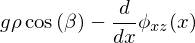

In [32]:
eq1=sp.limit(bilan,delta_x,0).doit()    # Ensuite, en faisant (doit()), on effectue vraiment la limite au point demandé
display(eq1)

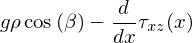

In [33]:
eq1=eq1.subs(phi_xz(x),tau_xz(x))    # remplacer phi par tau car la convection est nulle
display(eq1)

On insère ensuite la loi de Newton pour remplacer $\tau_{xz}$

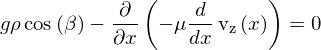

In [34]:
#
# Loi de Newton
vz=sp.Function('v_z')(x)
newton=-mu*sp.Derivative(vz,x)
#
# On la substitue dans le bilan
eq2=sp.Eq(eq1.subs(tau_xz(x),newton))
display(eq2)

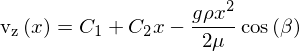

In [35]:
# La solution est faite avec la fonction dsolve de sympy
eq3=sp.dsolve(eq2,vz)
display(eq3)

>> Conditions aux limites,
>> en x = $\delta$

>>> ${v_{z}}{\left (\delta \right )} = C_{1} + C_{2} (\delta) - \frac{g \rho (\delta)^{2}}{2 \mu} \cos{\left (\beta \right )}$  $=0$

>> et en x=0

>>>$\frac  {{dv_{z}}}{dx} =  C_{2} - 2 \frac{g \rho (0)}{2 \mu} \cos{\left (\beta \right )}$  $=0$

> exercice facile à faire à la main, afin de nous préparer à des problèmes plus complexes à venir, voyons comment le résoudre avec **sympy**

'eq3 et eq4 (qui est eq3.rhs)'

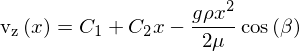

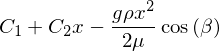

'Les deux conditions aux limites'

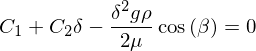

'les constantes C1 et C2'

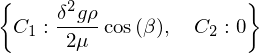

'Le profil est donc, en substituant C1 et C2 dans eq4'

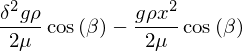

'ou dans eq3'

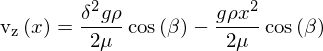

In [36]:
#
# Le rhs est la partie de droite de l'équation, c'est la partie qui nous intéresse
eq4=eq3.rhs
display('eq3 et eq4 (qui est eq3.rhs)',eq3,eq4)
#
# Pose et solution des 2 équations de conditions aux limites pour C1 et C2
#   la forme générale:
#   sp.solve([equation1, equation2, ...],('variable1, variable2,...'))
#
condition_1=sp.Eq(eq4.diff(x).subs(x,0    ),0) # L'équation 4 dérivée, quand x=0, est égale à 0
condition_2=sp.Eq(eq4.subs(x,delta)        ,0) # l'équation 4 quand x=delta est égale à 0
#
display('Les deux conditions aux limites',condition_1,condition_2)
constantes=sp.solve([condition_1,condition_2],('C1,C2') )                           # pour trouver C1 et C2
display('les constantes C1 et C2',constantes)
vz=eq4.subs(constantes)
display('Le profil est donc, en substituant C1 et C2 dans eq4',vz)
vzp=eq3.subs(constantes)
display('ou dans eq3',vzp)

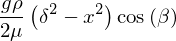

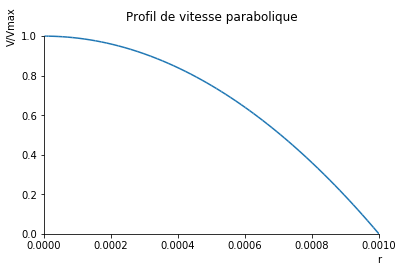

In [57]:
# Et le profil est obtenu.
display(vz.simplify())
#
# Qu'on peut maintenant tracer, en donnant des valeurs numériques bien choisies aux paramètres
#
dico={'beta':sp.pi/4,'delta':0.001,'g':9.81,'rho':1000,'mu':0.001}
vzmax=vz.subs(x,0).subs(dico).evalf(4)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 6,4  
sp.plot(vz.subs(dico)/vzmax,(x,0,0.001),title='Profil de vitesse parabolique',
       ylabel='V/Vmax',xlabel='r');

### À partir du profil de vitesses on peut calculer:

* La force que le fluide exerce sur la plaque: 

$
\begin{equation*}
  \boxed{ F = -\mu \bigg [\frac {dv_z}{dx}\bigg ]_{x=\delta} WL} 
  \end{equation*}
$
* Le débit volumétrique 

$
\begin{equation*}
  \boxed{ Q =\int_0 ^{W} \int_0 ^{\delta} v_z dx dy }
  \end{equation*}
$


* La vitesse moyenne

$
\begin{equation*}
  \boxed{ v_{z_{moyen}} = \frac {\int_0 ^{W} \int_0 ^{\delta} v_z dx dy }
                        {\int_0 ^{W} \int_0 ^{\delta} dx dy     }}
  \end{equation*}
$


### Utilisons sympy

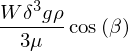

In [59]:
force=-mu*vz.diff(x).subs(x,delta)*L*W
display(force)
y=sp.symbols('y')
display(sp.integrate(vz,(x,0,delta),(y,0,W)))

>>> Quel est le poids du film de liquide?

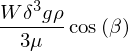

In [13]:
debit=sp.integrate(vz,(x,0,delta))*W
display(debit)

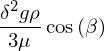

In [14]:
vzmoyen=debit/(delta*W)
display(vzmoyen)

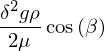

In [15]:
vzmax=vz.subs(x,0)
display(vzmax)

In [16]:
display(vzmoyen/vzmax)